In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report

# Models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Loading smoteTomek-resampled dataset
df = pd.read_csv("../data/resampled_datas/resampled_smotetomek.csv")
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [3]:
# Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Defining models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

results = []


MODEL: Decision Tree
Accuracy: 0.8161
ROC-AUC: 0.8172
PR-AUC: 0.8581

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       968
         1.0       0.81      0.82      0.81       930

    accuracy                           0.82      1898
   macro avg       0.82      0.82      0.82      1898
weighted avg       0.82      0.82      0.82      1898



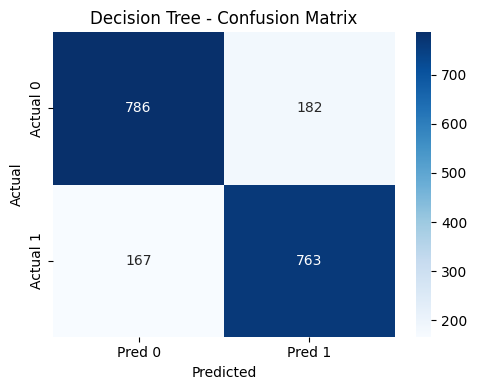


MODEL: XGBoost


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8830
ROC-AUC: 0.9519
PR-AUC: 0.9585

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       968
         1.0       0.88      0.88      0.88       930

    accuracy                           0.88      1898
   macro avg       0.88      0.88      0.88      1898
weighted avg       0.88      0.88      0.88      1898



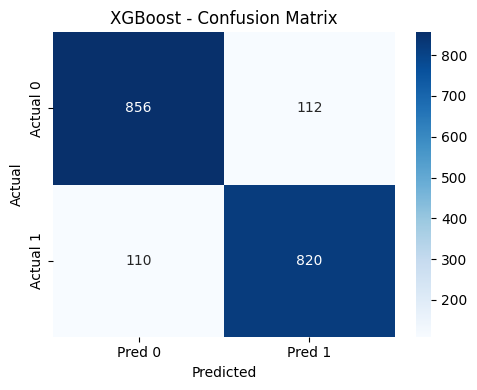


MODEL: KNN
Accuracy: 0.7966
ROC-AUC: 0.8686
PR-AUC: 0.8620

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79       968
         1.0       0.76      0.86      0.81       930

    accuracy                           0.80      1898
   macro avg       0.80      0.80      0.80      1898
weighted avg       0.80      0.80      0.80      1898



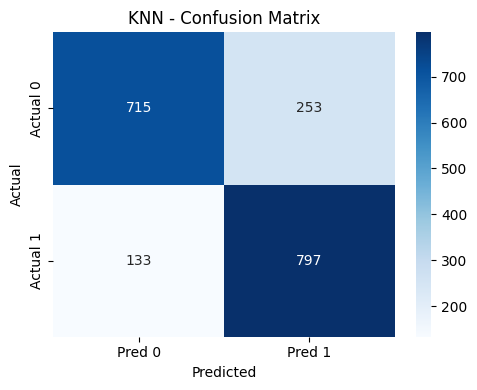


MODEL: Random Forest
Accuracy: 0.8793
ROC-AUC: 0.9499
PR-AUC: 0.9524

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       968
         1.0       0.89      0.87      0.88       930

    accuracy                           0.88      1898
   macro avg       0.88      0.88      0.88      1898
weighted avg       0.88      0.88      0.88      1898



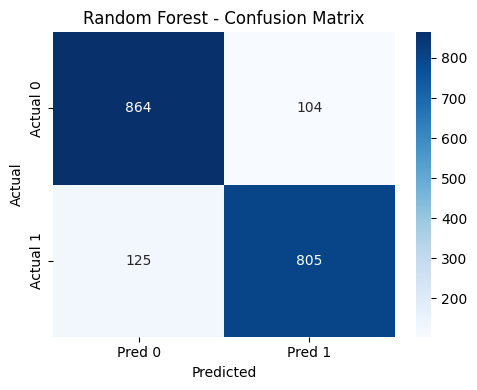


MODEL: Logistic Regression
Accuracy: 0.7908
ROC-AUC: 0.8773
PR-AUC: 0.8508

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       968
         1.0       0.77      0.83      0.79       930

    accuracy                           0.79      1898
   macro avg       0.79      0.79      0.79      1898
weighted avg       0.79      0.79      0.79      1898



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


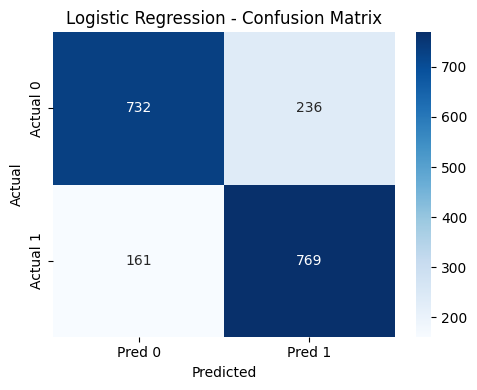


MODEL: SVM
Accuracy: 0.6870
ROC-AUC: 0.7585
PR-AUC: 0.7582

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       968
         1.0       0.69      0.66      0.67       930

    accuracy                           0.69      1898
   macro avg       0.69      0.69      0.69      1898
weighted avg       0.69      0.69      0.69      1898



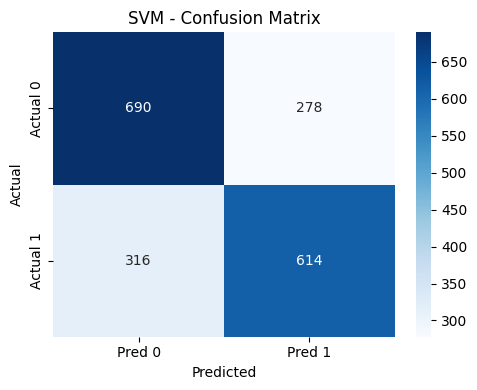


MODEL: Naive Bayes
Accuracy: 0.7777
ROC-AUC: 0.8574
PR-AUC: 0.8396

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76       968
         1.0       0.72      0.88      0.80       930

    accuracy                           0.78      1898
   macro avg       0.79      0.78      0.78      1898
weighted avg       0.79      0.78      0.78      1898



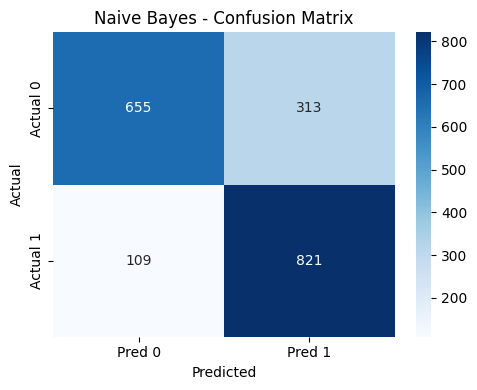

In [5]:
# Training and evaluating each model
for name, model in models.items():
    print(f"\nMODEL: {name}") 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculating performance metrics
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Storing results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": roc,
        "PR-AUC": pr_auc
    })

    # Ploting confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [6]:
# Showing results as a DataFrame
df_results = pd.DataFrame(results)
print("\nModel Comparison (sorted by PR-AUC):")
print(df_results.sort_values(by="PR-AUC", ascending=False))


Model Comparison (sorted by PR-AUC):
                 Model  Accuracy   ROC-AUC    PR-AUC
1              XGBoost  0.883035  0.951855  0.958465
3        Random Forest  0.879347  0.949927  0.952448
2                  KNN  0.796628  0.868649  0.862006
0        Decision Tree  0.816122  0.817229  0.858138
4  Logistic Regression  0.790832  0.877294  0.850766
6          Naive Bayes  0.777661  0.857408  0.839582
5                  SVM  0.687039  0.758454  0.758221


In [7]:
df_results["Resampling"] = "Smote Tomek"

# Save to CSV
df_results.to_csv(f"../data/results/results_st.csv", index=False)

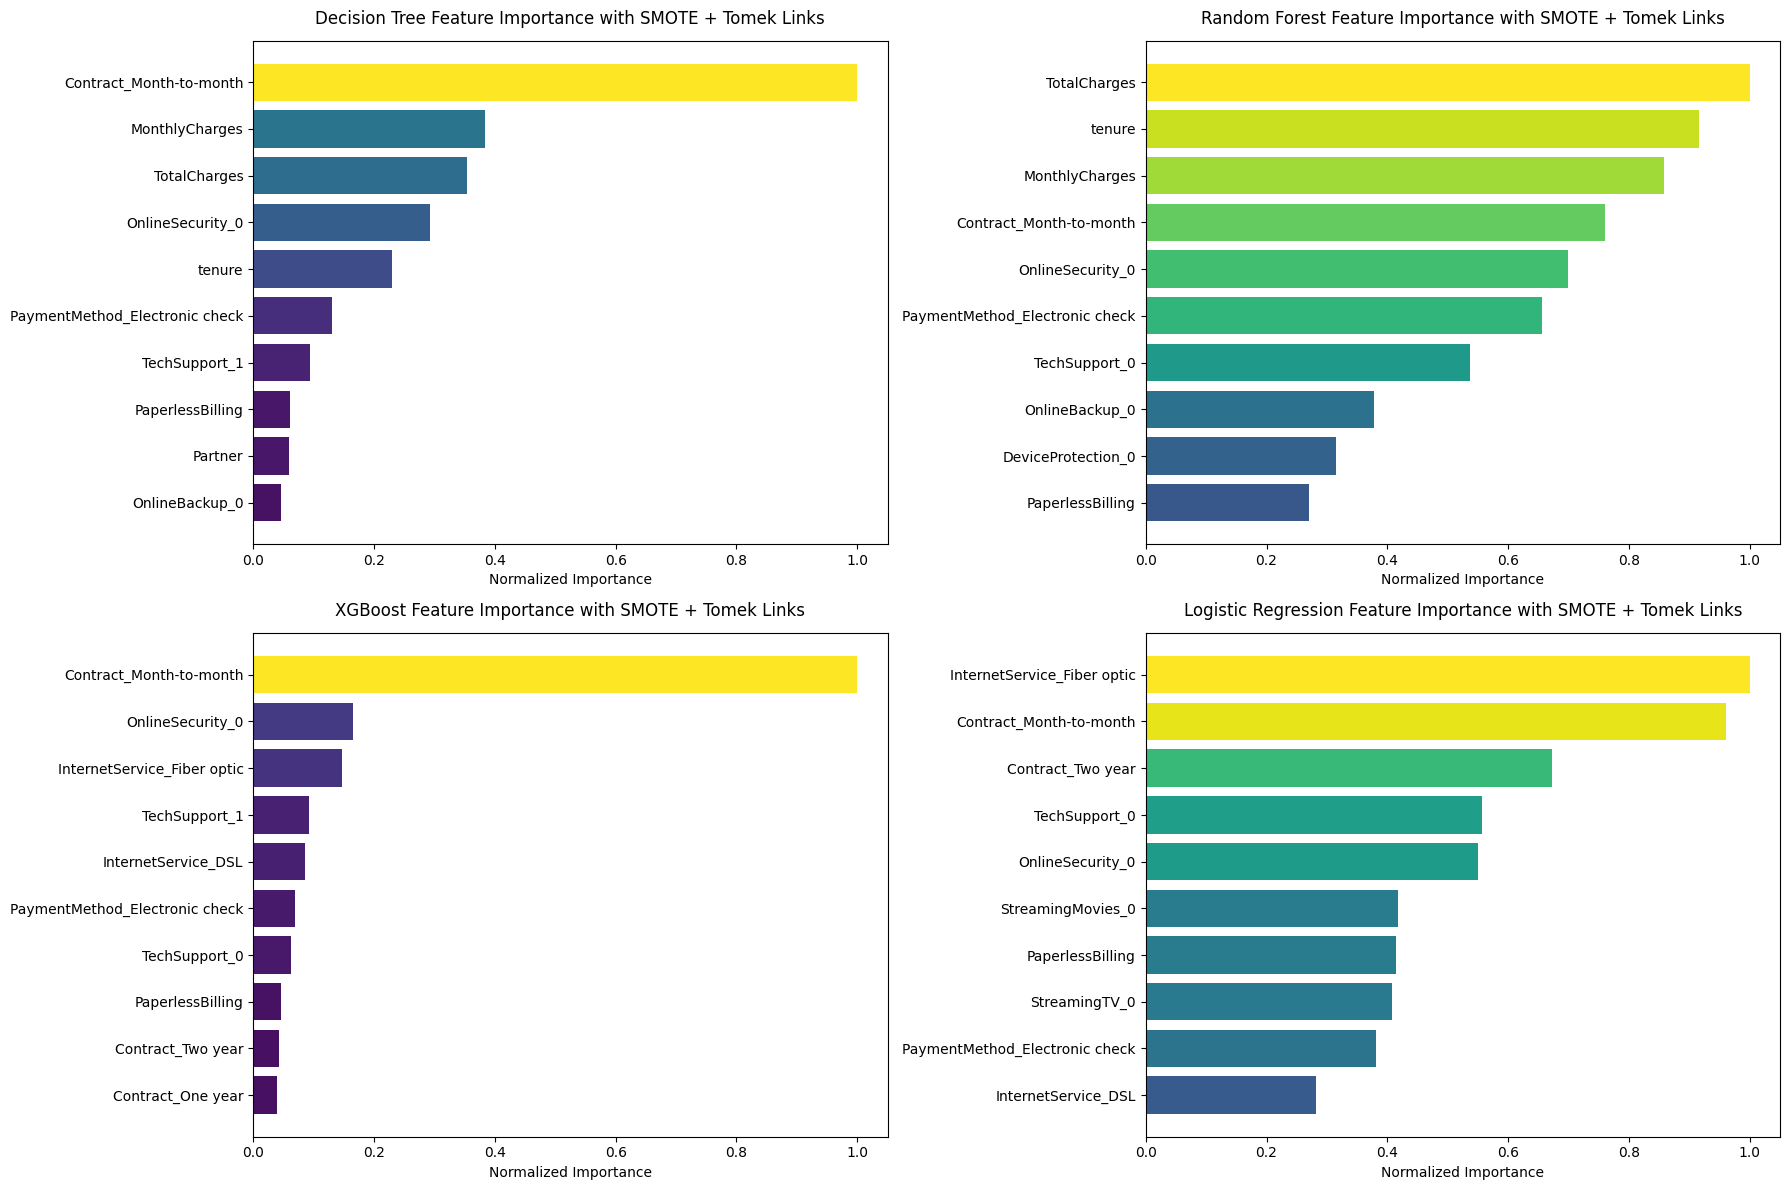

In [8]:
# Feature Importance 
import numpy as np
from sklearn.inspection import permutation_importance
from matplotlib import cm
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 12))
supported_models = {
    "Decision Tree": models["Decision Tree"],
    "Random Forest": models["Random Forest"],
    "XGBoost": models["XGBoost"],
    "Logistic Regression": models["Logistic Regression"]
}

for i, (name, model) in enumerate(supported_models.items(), 1):
    plt.subplot(2, 2, i)
    
    try:
        if name in ["Decision Tree", "Random Forest", "XGBoost"]:
            importances = model.feature_importances_
        elif name == "Logistic Regression":
            importances = np.abs(model.coef_[0])
        
        # normalization
        importances = (importances - importances.min()) / (importances.max() - importances.min() + 1e-10)
        feature_names = X.columns
        
        # Top 10 feature
        top_idx = np.argsort(importances)[-10:]
        plt.barh(range(len(top_idx)), importances[top_idx], align='center', color=cm.viridis(importances[top_idx]))
        plt.yticks(range(len(top_idx)), [feature_names[i] for i in top_idx])
        plt.title(f'{name} Feature Importance with SMOTE + Tomek Links', pad=12, fontsize=12)
        plt.xlabel('Normalized Importance', fontsize=10)
        
    except Exception as e:
        print(f"{name} coulnd't calculated: {str(e)}")
        continue

plt.tight_layout()
plt.show()

In [9]:
#KNN for feature importance

from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Feature Calculation with Permutation
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Results as data frame
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))


                                  Feature  Importance
5                          MonthlyCharges    0.193467
6                            TotalCharges    0.184510
3                                  tenure    0.042887
4                        PaperlessBilling    0.003109
29         PaymentMethod_Electronic check    0.002424
1                                 Partner    0.001949
15                     DeviceProtection_0    0.001686
28  PaymentMethod_Credit card (automatic)    0.001633
2                              Dependents    0.001159
10                       OnlineSecurity_0    0.000738


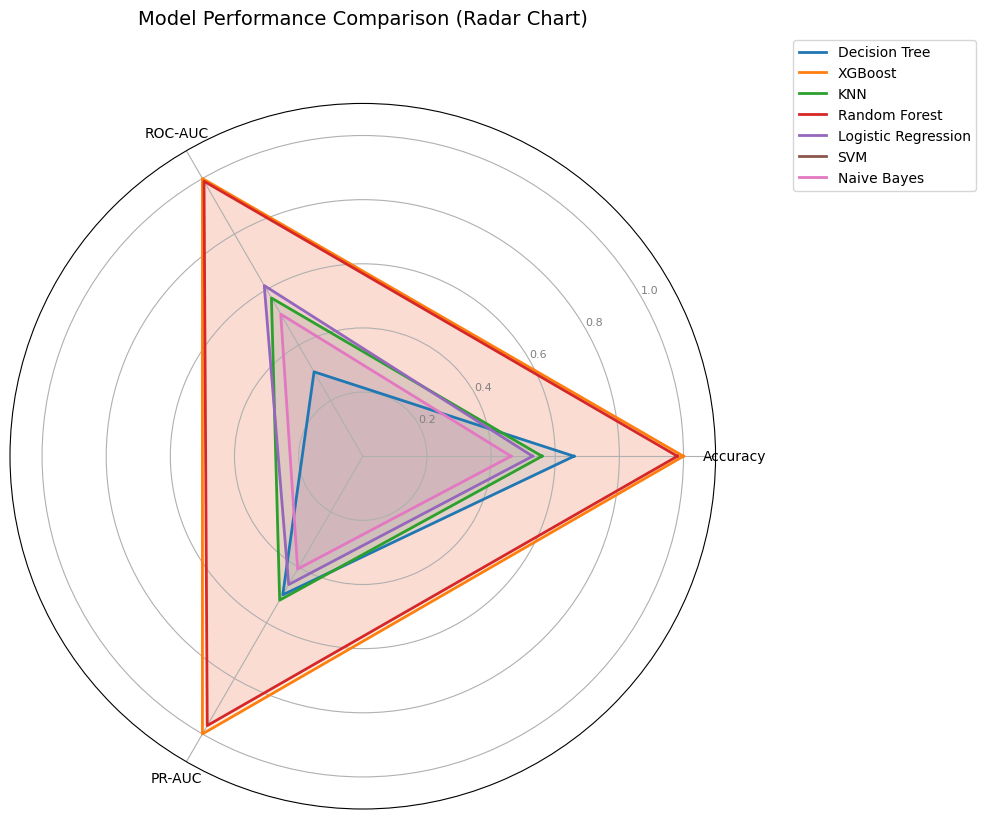

In [10]:
from math import pi

# Data for Radar chart
categories = ['Accuracy','ROC-AUC','PR-AUC']
df_radar = df_results.set_index('Model')[categories]

# Normalization
df_radar = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

# Radar chart:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

plt.xticks(angles := [i*2*pi/len(categories) for i in range(len(categories))], categories)
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.ylim(0, 1.1)

# Each model:
colors = plt.cm.tab10.colors
for idx, (model, row) in enumerate(df_radar.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]  
    ax.plot(angles + angles[:1], values, color=colors[idx], linewidth=2, linestyle='solid', label=model)
    ax.fill(angles + angles[:1], values, color=colors[idx], alpha=0.1)

plt.title('Model Performance Comparison (Radar Chart)', y=1.1, fontsize=14)
plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left')
plt.tight_layout()
plt.show()

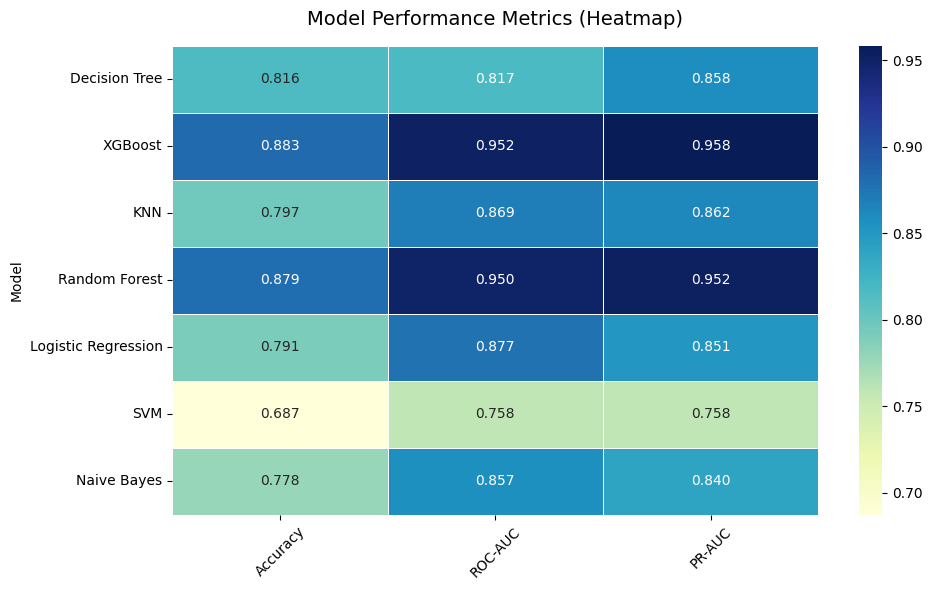

In [11]:
# Data for Heatmap
df_heat = df_results.set_index('Model')[['Accuracy', 'ROC-AUC', 'PR-AUC']]

plt.figure(figsize=(10, 6))
sns.heatmap(df_heat, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=.5)
plt.title('Model Performance Metrics (Heatmap)', pad=15, fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()